In [1]:
import boto3
import json
from os import listdir
from os.path import isfile, join
import glob
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import argrelextrema
import scipy.signal
# test

s3 = boto3.resource('s3')

In [2]:
def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()

number of columns :  90
   laXMax  laYMax  laZMax normlaMax  aaXMax   aaYMax   aaZMax normaaMax  \
0  35.766  51.374  50.751   64.6415  311.14  801.649  1093.63   1373.07   

   laXMin  laYMin  laZMin normlaMin  aaXMin   aaYMin   aaZMin normaaMin  \
0  35.766 -39.646 -18.168   20.4371 -98.541 -250.152 -452.781   11.4945   

   laX_int  laY_int  laZ_int normla_int  aaX_int  aaY_int  aaZ_int normaa_int  \
0  2896.68  4024.49  134.961    5584.72  1044.85  5230.95 -3983.25    23753.2   

  abs_laX_int abs_laY_int abs_laZ_int abs_normla_int abs_aaX_int abs_aaY_int  \
0     3030.42     4372.68     889.633        5584.72     5037.02     12319.8   

  abs_aaZ_int abs_normaa_int exp_laX_SR_max exp_laY_SR_max exp_laZ_SR_max  \
0     17603.7        23753.2         1.7675        3.75776        3.83463   

  exp_normla_SR_max exp_aaX_SR_max exp_aaY_SR_max exp_aaZ_SR_max  \
0           2.50818        23.6046        61.3155        86.2029   

  exp_normaa_SR_max exp_laX_SR_min exp_laY_SR_min exp_laZ_

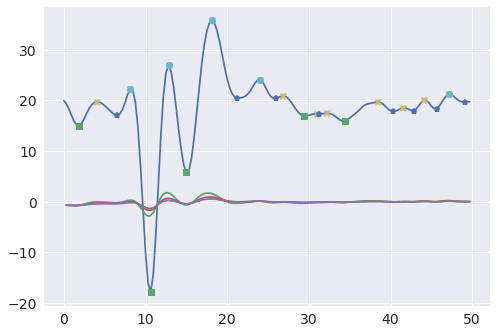

In [27]:
bucket = 'nsfcareer-users-data'
#Make sure you provide / in the end
prefix = '8725074595/simulation/09-17-2020/'
ImpactID = 0

client = boto3.client('s3')
result = client.list_objects(Bucket=bucket, Prefix=prefix, Delimiter='/')
#print(result)

#initialize input feature table
InpFeat = pd.DataFrame(columns=['laXMax','laYMax','laZMax','normlaMax','aaXMax','aaYMax','aaZMax','normaaMax', \
                                'laXMin','laYMin','laZMin','normlaMin','aaXMin','aaYMin','aaZMin','normaaMin', \
                                'laX_int','laY_int','laZ_int','normla_int','aaX_int','aaY_int','aaZ_int','normaa_int', \
                                'abs_laX_int','abs_laY_int','abs_laZ_int','abs_normla_int','abs_aaX_int','abs_aaY_int','abs_aaZ_int','abs_normaa_int', \
                                'exp_laX_SR_max', 'exp_laY_SR_max','exp_laZ_SR_max','exp_normla_SR_max','exp_aaX_SR_max','exp_aaY_SR_max','exp_aaZ_SR_max','exp_normaa_SR_max', \
                                'exp_laX_SR_min', 'exp_laY_SR_min','exp_laZ_SR_min','exp_normla_SR_min','exp_aaX_SR_min','exp_aaY_SR_min','exp_aaZ_SR_min','exp_normaa_SR_min', \
                                'exp_laX_10SR_max', 'exp_laY_10SR_max','exp_laZ_10SR_max','exp_normla_10SR_max','exp_aaX_10SR_max','exp_aaY_10SR_max','exp_aaZ_10SR_max','exp_normaa_10SR_max', \
                                'exp_laX_10SR_min', 'exp_laY_10SR_min','exp_laZ_10SR_min','exp_normla_10SR_min','exp_aaX_10SR_min','exp_aaY_10SR_min','exp_aaZ_10SR_min', 'exp_normaa_10SR_min', \
                                'exp_laX_100SR_max', 'exp_laY_100SR_max','exp_laZ_100SR_max','exp_normla_100SR_max','exp_aaX_100SR_max','exp_aaY_100SR_max','exp_aaZ_100SR_max','exp_normaa_100SR_max', \
                                'exp_laX_100SR_min', 'exp_laY_100SR_min','exp_laZ_100SR_min','exp_normla_100SR_min','exp_aaX_100SR_min','exp_aaY_100SR_min','exp_aaZ_100SR_min','exp_normaa_100SR_min', \
                                'peak_5ind_laX1', 'peak_5ind_laX2', 'peak_5ind_laX3','peak_5ind_laX4','peak_5ind_laX5', \
                                'valley_5ind_laX1', 'valley_5ind_laX2', 'valley_5ind_laX3','valley_5ind_laX4','valley_5ind_laX5'])



# read all the directories in this current date given in prefix above
for o in result.get('CommonPrefixes'):
    #print('sub folder : ', o.get('Prefix'))
    #print(o)
    prefix2 = o.get('Prefix')
    files = client.list_objects(Bucket=bucket, Prefix=prefix2, Delimiter='/')
    #print(files)
    # try to find the input.json file 
    if ImpactID == 1:
        break
    for m in files.get('Contents'):
        keyword = 'input.json'
        filestring = m.get('Key')
        #print('subfile : ',m.get('Key'))
        # read the file and stores its values
        if keyword in filestring:
            #print(filestring)
            jsonfile='s3://' + bucket + '/'+ filestring
            #print(jsonfile)
            f = client.get_object(Bucket=bucket, Key=filestring) 
            #print(f)
            #d = json.dumps(f,default = myconverter, indent=2,sort_keys=True)
            #print(d)
            text = f["Body"].read().decode()
            #print(text)
            jo = json.loads(text)
            #print(jo["player"])
            #print(jo["simulation"])
            #print(jo["simulation"]["mesh"])
            #print(jo["simulation"]["linear-acceleration"])
            #print(jo["simulation"]["linear-acceleration"]["xv"])
            #print(jo["simulation"]["linear-acceleration"]["yv"])
            #print(jo["simulation"]["linear-acceleration"]["zv"])
            # save linear acceleration (la)
            laX=jo["simulation"]["linear-acceleration"]["xv"]
            laY=jo["simulation"]["linear-acceleration"]["yv"]
            laZ=jo["simulation"]["linear-acceleration"]["zv"]
            # save linear acceleration time (laT)
            # these should be the same for sensor companies. 
            # we saved different time arrays for the Hardy validation.
            laTX=jo["simulation"]["linear-acceleration"]["xt"]
            #laTY=jo["simulation"]["linear-acceleration"]["yt"]
            #laTZ=jo["simulation"]["linear-acceleration"]["zt"]
            # save angular acceleration (aa)
            aaX=jo["simulation"]["angular-acceleration"]["xv"]
            aaY=jo["simulation"]["angular-acceleration"]["yv"]
            aaZ=jo["simulation"]["angular-acceleration"]["zv"]
            normla = []
            normaa = []
            abs_laX = []
            abs_laY = []
            abs_laZ = []
            abs_normla = []
            abs_aaX = []
            abs_aaY = []
            abs_aaZ = []
            abs_normaa = []
            # compute magnitude/norm of vectors
            for i in range(len(laTX)): # assumes time array is same length as la and aa
                normlai = math.sqrt(laX[i]*laX[i] +  laY[i]*laY[i] + laZ[i]*laZ[i])
                normla.append(normlai)
                normaai = math.sqrt(aaX[i]*aaX[i] +  aaY[i]*aaY[i] + aaZ[i]*aaZ[i])
                normaa.append(normaai)
                abs_laX.append(abs(laX[i]))
                abs_laY.append(abs(laY[i]))
                abs_laZ.append(abs(laZ[i]))
                abs_normla.append(abs(normla[i]))
                abs_aaX.append(abs(aaX[i]))
                abs_aaY.append(abs(aaY[i]))
                abs_aaZ.append(abs(aaZ[i]))
                abs_normaa.append(abs(normaa[i]))
                #print(normlai)
            
            #print(type(laX))
            lst = [laTX,laX,laY,laZ,normla,aaX,aaY,aaZ,normaa]
            df = pd.DataFrame(lst)
            data = df.transpose() 
            data.columns=['Time','laX','laY','laZ','normla','aaX','aaY','aaZ','normaa'] #Rename the columns
            #print(data)
            #
            # calculate the mean of each column in data table
            #laX_mean = data['laX'].mean()
            #laY_mean = data['laY'].mean()
            #laZ_mean = data['laZ'].mean()
            #normla_mean = data['normla'].mean()
            #aaX_mean = data['aaX'].mean()
            #aaY_mean = data['aaY'].mean()
            #aaZ_mean = data['aaZ'].mean()
            #normaa_mean = data['normaa'].mean()
            #print('laX_mean : ',laX_mean)
            #print('laY_mean : ',laY_mean)
            #print('laZ_mean : ',laZ_mean)
            #print('normla_mean : ',normla_mean)
            #print('aaX_mean : ',aaX_mean)
            #print('aaY_mean : ',aaY_mean)
            #print('aaZ_mean : ',aaZ_mean)
            #print('normaa_mean : ',normaa_mean)
            #
            # compute derivative of time signal
            diff_laX = data.laX.diff()
            diff_laY = data.laY.diff()
            diff_laZ = data.laZ.diff()
            diff_normla = data.normla.diff()
            diff_aaX = data.aaX.diff()
            diff_aaY = data.aaY.diff()
            diff_aaZ = data.aaZ.diff()
            diff_normaa = data.normaa.diff()
            #print('length of diff_laX : ',len(diff_laX))
             
            # compute expential moving average of the derivative of the time signal with SR
            exp_laX_SR = diff_laX.ewm(span = 20, adjust=False).mean()
            exp_laY_SR = diff_laY.ewm(span = 20, adjust=False).mean()
            exp_laZ_SR = diff_laZ.ewm(span = 20, adjust=False).mean()
            exp_normla_SR = diff_normla.ewm(span = 20, adjust=False).mean()
            exp_aaX_SR = diff_aaX.ewm(span = 20, adjust=False).mean()
            exp_aaY_SR = diff_aaY.ewm(span = 20, adjust=False).mean()
            exp_aaZ_SR = diff_aaZ.ewm(span = 20, adjust=False).mean()
            exp_normaa_SR = diff_normaa.ewm(span = 20, adjust=False).mean()
            
            # compute expential moving average of the derivative of the time signal with 10SR
            exp_laX_10SR = diff_laX.ewm(span = 40, adjust=False).mean()
            exp_laY_10SR = diff_laY.ewm(span = 40, adjust=False).mean()
            exp_laZ_10SR = diff_laZ.ewm(span = 40, adjust=False).mean()
            exp_normla_10SR = diff_normla.ewm(span = 40, adjust=False).mean()
            exp_aaX_10SR = diff_aaX.ewm(span = 40, adjust=False).mean()
            exp_aaY_10SR = diff_aaY.ewm(span = 40, adjust=False).mean()
            exp_aaZ_10SR = diff_aaZ.ewm(span = 40, adjust=False).mean()
            exp_normaa_10SR = diff_normaa.ewm(span = 40, adjust=False).mean()
            
            # compute expential moving average of the derivative of the time signal with 100SR
            exp_laX_100SR = diff_laX.ewm(span = 60, adjust=False).mean()
            exp_laY_100SR = diff_laY.ewm(span = 60, adjust=False).mean()
            exp_laZ_100SR = diff_laZ.ewm(span = 60, adjust=False).mean()
            exp_normla_100SR = diff_normla.ewm(span = 60, adjust=False).mean()
            exp_aaX_100SR = diff_aaX.ewm(span = 60, adjust=False).mean()
            exp_aaY_100SR = diff_aaY.ewm(span = 60, adjust=False).mean()
            exp_aaZ_100SR = diff_aaZ.ewm(span = 60, adjust=False).mean()
            exp_normaa_100SR = diff_normaa.ewm(span = 60, adjust=False).mean()
            #
            # Compute maximum extrema of time signal 
            maxima_laX = argrelextrema(data.laX.values, np.greater)
            maxima_laY = argrelextrema(data.laY.values, np.greater)
            maxima_laZ = argrelextrema(data.laZ.values, np.greater)
            maxima_normla = argrelextrema(data.normla.values, np.greater)
            maxima_aaX = argrelextrema(data.aaX.values, np.greater)
            maxima_aaY = argrelextrema(data.aaY.values, np.greater)
            maxima_aaZ = argrelextrema(data.aaZ.values, np.greater)
            maxima_normaa = argrelextrema(data.normaa.values, np.greater)
            # get all the peak indices       
            peak_indexes_laX = maxima_laX[0]
            peak_indexes_laY = maxima_laY[0]
            peak_indexes_laZ = maxima_laZ[0]
            peak_indexes_normla = maxima_normla[0]
            peak_indexes_aaX = maxima_aaX[0]
            peak_indexes_aaY = maxima_aaY[0]
            peak_indexes_aaZ = maxima_aaZ[0]
            peak_indexes_normaa = maxima_normaa[0]
            #print('Peaks are: %s' % (peak_indexes_laX))
            #
            # extract top 5 peak indices
            peak_5ind_laX = np.argpartition(data.laX[peak_indexes_laX], -5)[-5:]
            peak_5ind_laY = np.argpartition(data.laY[peak_indexes_laY], -5)[-5:]
            peak_5ind_laZ = np.argpartition(data.laZ[peak_indexes_laZ], -5)[-5:]
            peak_5ind_normla = np.argpartition(data.normla[peak_indexes_normla], -5)[-5:]
            peak_5ind_aaX = np.argpartition(data.aaX[peak_indexes_aaX], -5)[-5:]
            peak_5ind_aaY = np.argpartition(data.aaY[peak_indexes_aaY], -5)[-5:]
            peak_5ind_aaZ = np.argpartition(data.aaZ[peak_indexes_aaZ], -5)[-5:]
            peak_5ind_normaa = np.argpartition(data.normaa[peak_indexes_normaa], -5)[-5:]
            #print(peak_5ind_laX)
            #print(data.laX[peak_indexes_laX[peak_5ind_laX]])
            #print(data.laX[peak_indexes_laX[peak_5ind_laX.iloc[0]]])

             #df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
            
            #print('len of exp_laX : ',len(exp_laX))
            # create Input Feature Table values
            #
            #
            # Compute maximum extrema of time signal 
            minima_laX = argrelextrema(data.laX.values, np.less)
            minima_laY = argrelextrema(data.laY.values, np.less)
            minima_laZ = argrelextrema(data.laZ.values, np.less)
            minima_normla = argrelextrema(data.normla.values, np.less)
            minima_aaX = argrelextrema(data.aaX.values, np.less)
            minima_aaY = argrelextrema(data.aaY.values, np.less)
            minima_aaZ = argrelextrema(data.aaZ.values, np.less)
            minima_normaa = argrelextrema(data.normaa.values, np.less)
            #print(minima_laX[0])
            #
            # get all the valley minima indices       
            valley_indexes_laX = minima_laX[0]
            valley_indexes_laY = minima_laY[0]
            valley_indexes_laZ = minima_laZ[0]
            valley_indexes_normla = minima_normla[0]
            valley_indexes_aaX = minima_aaX[0]
            valley_indexes_aaY = minima_aaY[0]
            valley_indexes_aaZ = minima_aaZ[0]
            valley_indexes_normaa = minima_normaa[0]
            #print('Valleys are: %s' % (valley_indexes_laX))
            #
            # extract top 5 valley indices
            valley_5ind_laX = np.argpartition(data.laX[valley_indexes_laX], 5)[:5]
            valley_5ind_laY = np.argpartition(data.laY[valley_indexes_laY], 5)[:5]
            valley_5ind_laZ = np.argpartition(data.laZ[valley_indexes_laZ], 5)[:5]
            valley_5ind_normla = np.argpartition(data.normla[valley_indexes_normla], 5)[:5]
            valley_5ind_aaX = np.argpartition(data.aaX[valley_indexes_aaX], 5)[:5]
            valley_5ind_aaY = np.argpartition(data.aaY[valley_indexes_aaY], 5)[:5]
            valley_5ind_aaZ = np.argpartition(data.aaZ[valley_indexes_aaZ], 5)[:5]
            valley_5ind_normaa = np.argpartition(data.normaa[valley_indexes_normaa], 5)[:5]
            #print(valley_5ind_laX)
            #print(data.laX[valley_indexes_laX[valley_5ind_laX]])
            #print(data.laX[valley_indexes_laX[valley_5ind_laX.iloc[0]]])
            #
            # line plot of data table
            plt.style.use('seaborn')
            plt.plot(data.Time, data.laX, label='laX')
            plt.plot(data.Time, exp_laX_SR, label='laX EMA SR')
            plt.plot(data.Time, exp_laX_10SR, label='laX EMA 10SR')
            plt.plot(data.Time, exp_laX_100SR, label='laX EMA 100SR')
            plt.plot(data.Time[peak_indexes_laX],data.laX[peak_indexes_laX], 'X', label='peaks')
            plt.plot(data.Time[peak_indexes_laX[peak_5ind_laX]],data.laX[peak_indexes_laX[peak_5ind_laX]], 'o', label='5 max peaks')
            plt.plot(data.Time[valley_indexes_laX],data.laX[valley_indexes_laX], 'p', label='valleys')
            plt.plot(data.Time[valley_indexes_laX[valley_5ind_laX]],data.laX[valley_indexes_laX[valley_5ind_laX]], 's', label='5 min valleys')
            # modify ticks size
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            #
            #max values
            InpFeat.at[ImpactID, 'laXMax'] = data['laX'].max()
            InpFeat.at[ImpactID, 'laYMax'] = data['laY'].max()
            InpFeat.at[ImpactID, 'laZMax'] = data['laZ'].max()
            InpFeat.at[ImpactID, 'normlaMax'] = data['normla'].max()
            InpFeat.at[ImpactID, 'aaXMax'] = data['aaX'].max()
            InpFeat.at[ImpactID, 'aaYMax'] = data['aaY'].max()
            InpFeat.at[ImpactID, 'aaZMax'] = data['aaZ'].max()
            InpFeat.at[ImpactID, 'normaaMax'] = data['normaa'].max()
            #
            # min values
            InpFeat.at[ImpactID, 'laXMin'] = data['laX'].max()
            InpFeat.at[ImpactID, 'laYMin'] = data['laY'].min()
            InpFeat.at[ImpactID, 'laZMin'] = data['laZ'].min()
            InpFeat.at[ImpactID, 'normlaMin'] = data['normla'].min()
            InpFeat.at[ImpactID, 'aaXMin'] = data['aaX'].min()
            InpFeat.at[ImpactID, 'aaYMin'] = data['aaY'].min()
            InpFeat.at[ImpactID, 'aaZMin'] = data['aaZ'].min()
            InpFeat.at[ImpactID, 'normaaMin'] = data['normaa'].min()
            #
            # IRntegral of the time-signal
            InpFeat.at[ImpactID, 'laX_int'] = integrate.trapz(laX)
            InpFeat.at[ImpactID, 'laY_int'] = integrate.trapz(laY)
            InpFeat.at[ImpactID, 'laZ_int'] = integrate.trapz(laZ)
            InpFeat.at[ImpactID, 'normla_int'] = integrate.trapz(normla)
            InpFeat.at[ImpactID, 'aaX_int'] = integrate.trapz(aaX)
            InpFeat.at[ImpactID, 'aaY_int'] = integrate.trapz(aaY)
            InpFeat.at[ImpactID, 'aaZ_int'] = integrate.trapz(aaZ)
            InpFeat.at[ImpactID, 'normaa_int'] = integrate.trapz(normaa)
            #
            # Integral of the absolute values of time-signal
            InpFeat.at[ImpactID, 'abs_laX_int'] = integrate.trapz(abs_laX)
            InpFeat.at[ImpactID, 'abs_laY_int'] = integrate.trapz(abs_laY)
            InpFeat.at[ImpactID, 'abs_laZ_int'] = integrate.trapz(abs_laZ)
            InpFeat.at[ImpactID, 'abs_normla_int'] = integrate.trapz(abs_normla)
            InpFeat.at[ImpactID, 'abs_aaX_int'] = integrate.trapz(abs_aaX)
            InpFeat.at[ImpactID, 'abs_aaY_int'] = integrate.trapz(abs_aaY)
            InpFeat.at[ImpactID, 'abs_aaZ_int'] = integrate.trapz(abs_aaZ)
            InpFeat.at[ImpactID, 'abs_normaa_int'] = integrate.trapz(abs_normaa)
            #
            # maximum of expential moving average of the derivative of the time signal with SR
            InpFeat.at[ImpactID, 'exp_laX_SR_max'] = exp_laX_SR.max()
            InpFeat.at[ImpactID, 'exp_laY_SR_max'] = exp_laY_SR.max()
            InpFeat.at[ImpactID, 'exp_laZ_SR_max'] = exp_laZ_SR.max()
            InpFeat.at[ImpactID, 'exp_normla_SR_max'] = exp_normla_SR.max()
            InpFeat.at[ImpactID, 'exp_aaX_SR_max'] = exp_aaX_SR.max()
            InpFeat.at[ImpactID, 'exp_aaY_SR_max'] = exp_aaY_SR.max()
            InpFeat.at[ImpactID, 'exp_aaZ_SR_max'] = exp_aaZ_SR.max()
            InpFeat.at[ImpactID, 'exp_normaa_SR_max'] = exp_normaa_SR.max()
            #
            # minimum of expential moving average of the derivative of the time signal with SR
            InpFeat.at[ImpactID, 'exp_laX_SR_min'] = exp_laX_SR.min()
            InpFeat.at[ImpactID, 'exp_laY_SR_min'] = exp_laY_SR.min()
            InpFeat.at[ImpactID, 'exp_laZ_SR_min'] = exp_laZ_SR.min()
            InpFeat.at[ImpactID, 'exp_normla_SR_min'] = exp_normla_SR.min()
            InpFeat.at[ImpactID, 'exp_aaX_SR_min'] = exp_aaX_SR.min()
            InpFeat.at[ImpactID, 'exp_aaY_SR_min'] = exp_aaY_SR.min()
            InpFeat.at[ImpactID, 'exp_aaZ_SR_min'] = exp_aaZ_SR.min()
            InpFeat.at[ImpactID, 'exp_normaa_SR_min'] = exp_normaa_SR.min()
            #
            # maximum of expential moving average of the derivative of the time signal with 10SR
            InpFeat.at[ImpactID, 'exp_laX_10SR_max'] = exp_laX_10SR.max()
            InpFeat.at[ImpactID, 'exp_laY_10SR_max'] = exp_laY_10SR.max()
            InpFeat.at[ImpactID, 'exp_laZ_10SR_max'] = exp_laZ_10SR.max()
            InpFeat.at[ImpactID, 'exp_normla_10SR_max'] = exp_normla_10SR.max()
            InpFeat.at[ImpactID, 'exp_aaX_10SR_max'] = exp_aaX_10SR.max()
            InpFeat.at[ImpactID, 'exp_aaY_10SR_max'] = exp_aaY_10SR.max()
            InpFeat.at[ImpactID, 'exp_aaZ_10SR_max'] = exp_aaZ_10SR.max()
            InpFeat.at[ImpactID, 'exp_normaa_10SR_max'] = exp_normaa_10SR.max()
            #
            # minimum of expential moving average of the derivative of the time signal with 10SR
            InpFeat.at[ImpactID, 'exp_laX_10SR_min'] = exp_laX_10SR.min()
            InpFeat.at[ImpactID, 'exp_laY_10SR_min'] = exp_laY_10SR.min()
            InpFeat.at[ImpactID, 'exp_laZ_10SR_min'] = exp_laZ_10SR.min()
            InpFeat.at[ImpactID, 'exp_normla_10SR_min'] = exp_normla_10SR.min()
            InpFeat.at[ImpactID, 'exp_aaX_10SR_min'] = exp_aaX_10SR.min()
            InpFeat.at[ImpactID, 'exp_aaY_10SR_min'] = exp_aaY_10SR.min()
            InpFeat.at[ImpactID, 'exp_aaZ_10SR_min'] = exp_aaZ_10SR.min()
            InpFeat.at[ImpactID, 'exp_normaa_10SR_min'] = exp_normaa_10SR.min()
            #
            # maximum of expential moving average of the derivative of the time signal with 100SR
            InpFeat.at[ImpactID, 'exp_laX_100SR_max'] = exp_laX_100SR.max()
            InpFeat.at[ImpactID, 'exp_laY_100SR_max'] = exp_laY_100SR.max()
            InpFeat.at[ImpactID, 'exp_laZ_100SR_max'] = exp_laZ_100SR.max()
            InpFeat.at[ImpactID, 'exp_normla_100SR_max'] = exp_normla_100SR.max()
            InpFeat.at[ImpactID, 'exp_aaX_100SR_max'] = exp_aaX_100SR.max()
            InpFeat.at[ImpactID, 'exp_aaY_100SR_max'] = exp_aaY_100SR.max()
            InpFeat.at[ImpactID, 'exp_aaZ_100SR_max'] = exp_aaZ_100SR.max()
            InpFeat.at[ImpactID, 'exp_normaa_100SR_max'] = exp_normaa_100SR.max()
            #
            # minimum of expential moving average of the derivative of the time signal with 100SR
            InpFeat.at[ImpactID, 'exp_laX_100SR_min'] = exp_laX_100SR.min()
            InpFeat.at[ImpactID, 'exp_laY_100SR_min'] = exp_laY_100SR.min()
            InpFeat.at[ImpactID, 'exp_laZ_100SR_min'] = exp_laZ_100SR.min()
            InpFeat.at[ImpactID, 'exp_normla_100SR_min'] = exp_normla_100SR.min()
            InpFeat.at[ImpactID, 'exp_aaX_100SR_min'] = exp_aaX_100SR.min()
            InpFeat.at[ImpactID, 'exp_aaY_100SR_min'] = exp_aaY_100SR.min()
            InpFeat.at[ImpactID, 'exp_aaZ_100SR_min'] = exp_aaZ_100SR.min()
            InpFeat.at[ImpactID, 'exp_normaa_100SR_min'] = exp_normaa_100SR.min()
            #
            # top 5 extrema peaks
            InpFeat.at[ImpactID, 'peak_5ind_laX1'] = data.laX[peak_indexes_laX[peak_5ind_laX.iloc[0]]]
            InpFeat.at[ImpactID, 'peak_5ind_laX2'] = data.laX[peak_indexes_laX[peak_5ind_laX.iloc[1]]]
            InpFeat.at[ImpactID, 'peak_5ind_laX3'] = data.laX[peak_indexes_laX[peak_5ind_laX.iloc[2]]]
            InpFeat.at[ImpactID, 'peak_5ind_laX4'] = data.laX[peak_indexes_laX[peak_5ind_laX.iloc[3]]]
            InpFeat.at[ImpactID, 'peak_5ind_laX5'] = data.laX[peak_indexes_laX[peak_5ind_laX.iloc[4]]]
            # top 5 minima valleys
            InpFeat.at[ImpactID, 'valley_5ind_laX1'] = data.laX[valley_indexes_laX[valley_5ind_laX.iloc[0]]]
            InpFeat.at[ImpactID, 'valley_5ind_laX2'] = data.laX[valley_indexes_laX[valley_5ind_laX.iloc[1]]]
            InpFeat.at[ImpactID, 'valley_5ind_laX3'] = data.laX[valley_indexes_laX[valley_5ind_laX.iloc[2]]]
            InpFeat.at[ImpactID, 'valley_5ind_laX4'] = data.laX[valley_indexes_laX[valley_5ind_laX.iloc[3]]]
            InpFeat.at[ImpactID, 'valley_5ind_laX5'] = data.laX[valley_indexes_laX[valley_5ind_laX.iloc[4]]]
            #print(InpFeat)
            ImpactID = ImpactID + 1
            #print(jo["linear-acceleration"])

    


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',5)
#print(len(InpFeat))
print('number of columns : ',len(InpFeat.columns))
print(InpFeat)


         
          
       